# Infnet

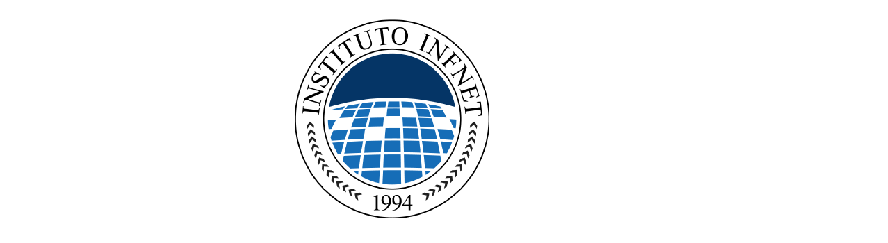

# SPARK

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 8.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=766230348adff06688a08c4305c318f2837c5b0610acd9fd1a01282016548011
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
import random
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Aula_Spark") \
    .getOrCreate()

df=spark.range(100) # Cria dataframe com 100 linhas
#print(df.collect()) # Imprime as 100 linhas
print(df.sample(0.05).collect()) # Retorna aproximadamente 5% de amostra aleatória

[Row(id=2), Row(id=3), Row(id=19), Row(id=69), Row(id=85), Row(id=94), Row(id=98)]


In [ ]:
# Create RDD
rdd = spark.sparkContext.range(1, 5)
print(rdd.collect())

[1, 2, 3, 4]


In [ ]:
# Fazendo download do arquivo
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/receita_federal/receita_federal_arrecadacao_por_UF_2020.csv

--2023-03-18 00:39:14--  https://raw.githubusercontent.com/jonates/opendata/master/receita_federal/receita_federal_arrecadacao_por_UF_2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6216 (6.1K) [text/plain]
Saving to: ‘receita_federal_arrecadacao_por_UF_2020.csv’

receita_federal_arr 100%[===================>]   6.07K  --.-KB/s    in 0s      

2023-03-18 00:39:14 (63.3 MB/s) - ‘receita_federal_arrecadacao_por_UF_2020.csv’ saved [6216/6216]



In [ ]:
# carregando um conjunto de dados que baixamos da internet
receitafederal = spark.read.csv(
    path = "/content/receita_federal_arrecadacao_por_UF_2020.csv", 
    inferSchema = True, 
    header = True,
    sep = ';', 
    encoding = "UTF-8")

In [ ]:
# Verificando o tipo de objeto criado
type(receitafederal)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Verificando o schema() deste sparkdataframe
receitafederal.printSchema()

root
 |-- uf: string (nullable = true)
 |-- regiao: string (nullable = true)
 |-- ano: integer (nullable = true)
 |-- imposto_sobre_importacao: string (nullable = true)
 |-- imposto_sobre_exportacao: string (nullable = true)
 |-- ipi_total: string (nullable = true)
 |-- imposto_sobre_a_renda_total: string (nullable = true)
 |-- irpf: string (nullable = true)
 |-- irpj: string (nullable = true)
 |-- imposto_s_renda_retido_na_fonte: string (nullable = true)
 |-- imposto_s_operacoes_financeiras: string (nullable = true)
 |-- imposto_territorial_rural: string (nullable = true)
 |-- cofins: string (nullable = true)
 |-- contribuicao_para_o_pis_pasep: string (nullable = true)
 |-- csll: string (nullable = true)
 |-- cide_combustiveis: string (nullable = true)
 |-- cpsss_contrib_p_o_plano_de_segurid_social_serv_publico: string (nullable = true)
 |-- outras_receitas_administradas: string (nullable = true)



In [ ]:
receitafederal.head()

Row(uf='AC', regiao='Norte', ano=2020, imposto_sobre_importacao='985174,77', imposto_sobre_exportacao='36,13', ipi_total='4240199,15', imposto_sobre_a_renda_total='300199853,59', irpf='62072028,88', irpj='113486699,53', imposto_s_renda_retido_na_fonte='124641125,18', imposto_s_operacoes_financeiras='1897985,08', imposto_territorial_rural='1487344,08', cofins='144057300,57', contribuicao_para_o_pis_pasep='76934968,18', csll='68168473,35', cide_combustiveis='0', cpsss_contrib_p_o_plano_de_segurid_social_serv_publico='104836396,45', outras_receitas_administradas='14062545,18')

In [ ]:
# Espiando o dataset
receitafederal.show()

+---+------------+----+------------------------+------------------------+-------------+---------------------------+-------------+--------------+-------------------------------+-------------------------------+-------------------------+--------------+-----------------------------+--------------+-----------------+------------------------------------------------------+-----------------------------+
| uf|      regiao| ano|imposto_sobre_importacao|imposto_sobre_exportacao|    ipi_total|imposto_sobre_a_renda_total|         irpf|          irpj|imposto_s_renda_retido_na_fonte|imposto_s_operacoes_financeiras|imposto_territorial_rural|        cofins|contribuicao_para_o_pis_pasep|          csll|cide_combustiveis|cpsss_contrib_p_o_plano_de_segurid_social_serv_publico|outras_receitas_administradas|
+---+------------+----+------------------------+------------------------+-------------+---------------------------+-------------+--------------+-------------------------------+----------------------------

Perceba que a variável irpf, apesar de ser numérica e contínua, foi lida como string, isto ocorre pois o conjunto de dados é do Brasil, e utiliza vírgula como o separador de casa decimal. Portanto, precisamos substituir a vírgula pelo ponto e em segunda mudar o tipo da variável de string para float conforme comandos a seguir:

In [ ]:
# importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *

In [ ]:
# Transformando o atributo irpf em numerica
receitafederal = receitafederal.withColumn(
    colName = 'irpf', 
    col = regexp_replace('irpf',',','.').cast('float')
    )

# Inspecionando o resultado
receitafederal.select('irpf').printSchema() #Pronto, agora a variável irpf está como numérica

root
 |-- irpf: float (nullable = true)



In [ ]:
# Verificando o total do irpf por Região do Brasil
receitafederal.groupBy('regiao').sum('irpf').orderBy('regiao').show()

+------------+--------------+
|      regiao|     sum(irpf)|
+------------+--------------+
|Centro-Oeste| 3.354157696E9|
|    Nordeste| 4.303029696E9|
|       Norte| 1.404179308E9|
|     Sudeste|2.496098528E10|
|         Sul| 7.380957184E9|
|       Total|4.140331008E10|
+------------+--------------+



# Resilient Distributed Dataset (RDD)

* https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.html
* https://spark.apache.org/docs/latest/rdd-programming-guide.html

# MapReduce


In [ ]:
counts = spark.sparkContext.textFile('blogSpark.txt')  \
            .flatMap(lambda line: line.split(" "))  \
            .map(lambda word: (word, 1))  \
            .reduceByKey(lambda a, b: a + b) 
counts.saveAsTextFile("resultado/result")



```
# Isto está formatado como código
```

Punctuation e maketrans

In [ ]:
#https://www.geeksforgeeks.org/string-punctuation-in-python/
# import string library function 
import string 
    
# Storing the sets of punctuation in variable result 
result = string.punctuation 
    
# Printing the punctuation values 
print("Resultado 1",result) 

print("Resultado 2",' ' * (11+len(string.punctuation)))

Resultado 1 !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Resultado 2                                            


In [ ]:
#https://www.w3schools.com/python/ref_string_maketrans.asp
txt = "Hello Sam!"
mytable = str.maketrans("S", "P")
print(txt.translate(mytable))

Hello Pam!


Word Count Via Função

In [ ]:
def wordCount(file):
  import string 
  punctFilter = str.maketrans(string.punctuation + '0123456789’', ' ' * (11+len(string.punctuation)))
  
  rdd = spark.sparkContext.textFile(file)\
           .map(lambda line: line.translate(punctFilter).strip().upper())\
           .flatMap(lambda line: [(word,1) for word in line.split()])\
           .reduceByKey(lambda x,y : x + y)\
           .sortBy(lambda kv: kv[1], ascending=False)
  return rdd

In [ ]:
import time
t = time.time()
words_rdd = wordCount("blogSpark.txt")
data = words_rdd.collect()
t = time.time() - t
print('Time elapsed: %f s' % t)
print('First 20 elements in the list with %d elements ' % len(data))
data[:20]

Time elapsed: 0.926091 s
First 20 elements in the list with 158 elements 


[('DE', 49),
 ('DADOS', 19),
 ('O', 18),
 ('QUE', 15),
 ('SPARK', 14),
 ('EM', 14),
 ('UMA', 13),
 ('PROCESSAMENTO', 12),
 ('É', 11),
 ('PARA', 10),
 ('E', 10),
 ('GRANDES', 7),
 ('CONJUNTOS', 6),
 ('ISSO', 6),
 ('PLATAFORMA', 6),
 ('TORNA', 5),
 ('COM', 5),
 ('A', 5),
 ('MAIS', 5),
 ('UM', 4)]

In [ ]:
# reduce is another action (not a transformation like reduceByKey!)
# We can use it obtain the total number of words
total_words = words_rdd.values().reduce(lambda x,y: x+y)
print('Total words [1]: %d' % total_words)

# We can just use the sum utility action in this case
total_words = words_rdd.values().sum()
print('Total words [2]: %d' % total_words)

Total words [1]: 428
Total words [2]: 428


word frequencies

In [ ]:
freq_rdd = words_rdd.map(lambda kv: (kv[0], kv[1] / total_words))
freq_rdd.take(10)

[('DE', 0.11448598130841121),
 ('DADOS', 0.04439252336448598),
 ('O', 0.04205607476635514),
 ('QUE', 0.035046728971962614),
 ('SPARK', 0.03271028037383177),
 ('EM', 0.03271028037383177),
 ('UMA', 0.030373831775700934),
 ('PROCESSAMENTO', 0.028037383177570093),
 ('É', 0.02570093457943925),
 ('PARA', 0.02336448598130841)]

In [ ]:
# Simpler alternative 
freq_rdd = words_rdd.mapValues(lambda count: count / total_words)
freq_rdd.take(10)

[('DE', 0.11448598130841121),
 ('DADOS', 0.04439252336448598),
 ('O', 0.04205607476635514),
 ('QUE', 0.035046728971962614),
 ('SPARK', 0.03271028037383177),
 ('EM', 0.03271028037383177),
 ('UMA', 0.030373831775700934),
 ('PROCESSAMENTO', 0.028037383177570093),
 ('É', 0.02570093457943925),
 ('PARA', 0.02336448598130841)]